In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_df = pd.read_csv("drive/MyDrive/Capstone/dataCorrect2222.csv",sep=";",parse_dates=['ValueDate'],dayfirst=True, encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20,25,26,32,34,38,40,44,46,48,50,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Initial EDA and Cleaning

In [4]:
data_df.sample(5)

,Id,ClientID,ClientDescription,OrganizationalUnitID,OrganizationalUnitDescription,OrganizationalUnitTypeID,OrganizationalUnitTypeDescription,SourceID,SourceDescription,ValueDate,...,WasteTypeID,WasteTypeDescription,WasteTreatmentID,WasteTreatmentDescription,TransportID,TransportDescription,TransportTypeID,TransportTypeDescription,BiogenicEmission,Renovable
290133,1269349.0,460.0,Cliente anonimizado,409.0,Unidad organizativa anonimizada,10.0,Delegación,10998.0,0007078836114125197 Gasoleo,2021-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
364026,1356222.0,460.0,Cliente anonimizado,414.0,Unidad organizativa anonimizada,10.0,Delegación,12968.0,0007078837313222645 Gasolina,2021-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
271529,1201734.0,700.0,Cliente anonimizado,1606.0,Unidad organizativa anonimizada,3.0,Oficina,26247.0,Consumo gasolina (7137-LNR),2021-07-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
171701,580119.0,460.0,Cliente anonimizado,410.0,Unidad organizativa anonimizada,10.0,Delegación,11286.0,0007078836114126179 Gasoleo,2019-06-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
239168,777461.0,690.0,Cliente anonimizado,1571.0,Unidad organizativa anonimizada,28.0,Espacio oficina,21736.0,Consumo eléctrico oficinas,2021-07-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [5]:
#Check data types of columns
pd.DataFrame(data_df.columns, data_df.dtypes)

,0
float64,Id
float64,ClientID
object,ClientDescription
float64,OrganizationalUnitID
object,OrganizationalUnitDescription
float64,OrganizationalUnitTypeID
object,OrganizationalUnitTypeDescription
float64,SourceID
object,SourceDescription
datetime64[ns],ValueDate


In [6]:
#show shape of our the dataset
data_df.shape

(514271, 55)

In [7]:
#check for null values
pd.DataFrame(data_df.isnull().sum()).sort_values(0,ascending = True)

,0
FactorDescription,48
AspectGroupDescription,48
Year,73
ClientID,85
ClientDescription,85
Id,97
AspectDescription,97
AspectID,97
FactorID,97
AspectGroupID,97


In [8]:
data_df.head()

,Id,ClientID,ClientDescription,OrganizationalUnitID,OrganizationalUnitDescription,OrganizationalUnitTypeID,OrganizationalUnitTypeDescription,SourceID,SourceDescription,ValueDate,...,WasteTypeID,WasteTypeDescription,WasteTreatmentID,WasteTreatmentDescription,TransportID,TransportDescription,TransportTypeID,TransportTypeDescription,BiogenicEmission,Renovable
0,7958.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1,7959.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,7960.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,7961.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4,7962.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [9]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [10]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data_df)
#profile.to_notebook_iframe()

## Sanity Check if Id and Description matchs for all Columns
As we have duplicate columns for Id and description we tried to check if both Id and description match. This is necessary to decide which columns to use and which columns to ignore.

In [11]:
data_df["UnitID"].value_counts()

7.0     362157
2.0      93481
4.0      27205
1.0      17217
6.0       7195
5.0       5657
45.0       178
36.0       174
21.0       172
50.0       144
47.0       103
51.0       101
56.0        80
58.0        72
46.0        66
27.0        43
18.0        24
59.0        24
60.0        24
41.0        18
13.0        14
15.0        12
44.0         1
Name: UnitID, dtype: int64

In [12]:
data_df["UnitDescription"].value_counts()

t             362157
l              93481
kWh            27205
kg             17217
m3              7195
km              5657
Ud               178
Informe          174
Copias           172
MWh              144
Horas            103
ha               101
pue               80
m2                72
Noche             66
                 43
Paquete A4        24
gal               24
th                24
Folio             18
UdT               14
Paq.folios        12
ptos               1
Name: UnitDescription, dtype: int64

In [13]:
data_df["ClientID"].nunique()

58

In [14]:
data_df["ClientID"].unique()

array([3.00e+01, 7.00e+01, 1.20e+02, 1.30e+02, 1.60e+02, 1.70e+02,
       1.40e+02, 2.10e+02, 1.90e+02, 2.00e+02, 2.30e+02, 2.40e+02,
       2.60e+02, 2.50e+02, 3.66e+17, 3.54e+17, 3.31e+17,      nan,
       2.80e+02, 3.10e+02, 3.00e+02, 3.30e+02, 3.40e+02, 3.50e+02,
       3.60e+02, 4.00e+02, 4.30e+02, 3.70e+02, 3.90e+02, 3.80e+02,
       4.50e+02, 4.60e+02, 4.80e+02, 4.70e+02, 5.00e+02, 4.90e+02,
       5.30e+02, 5.20e+02, 5.10e+02, 5.50e+02, 5.40e+02, 5.70e+02,
       5.90e+02, 5.80e+02, 1.80e+02, 6.00e+02, 6.20e+02, 6.30e+02,
       6.10e+02, 6.80e+02, 6.50e+02, 6.90e+02, 7.00e+02, 7.10e+02,
       7.40e+02, 7.50e+02, 7.60e+02, 7.70e+02, 7.80e+02])

In [15]:
data_df = data_df[(data_df["ClientID"].notna()) & (~data_df["ClientID"].isin([3.66e+17, 3.54e+17, 3.31e+17]))]

In [16]:
data_df["ClientID"].unique()

array([ 30.,  70., 120., 130., 160., 170., 140., 210., 190., 200., 230.,
       240., 260., 250., 280., 310., 300., 330., 340., 350., 360., 400.,
       430., 370., 390., 380., 450., 460., 480., 470., 500., 490., 530.,
       520., 510., 550., 540., 570., 590., 580., 180., 600., 620., 630.,
       610., 680., 650., 690., 700., 710., 740., 750., 760., 770., 780.])

In [17]:
data_df["ClientID"].nunique()

55

We have 55 unique clients data

In [18]:
data_df["ClientDescription"].value_counts()

Cliente anonimizado    514174
Name: ClientDescription, dtype: int64

However the descritpion of the client is not given due to privacy

In [19]:
data_df["OrganizationalUnitID"].value_counts()

414.0     131770
409.0      96396
412.0      44393
411.0      32744
410.0      32144
           ...  
1565.0         3
1054.0         2
114.0          2
109.0          2
396.0          2
Name: OrganizationalUnitID, Length: 474, dtype: int64

We have 474 unique organizational unit

In [20]:
data_df["OrganizationalUnitDescription"].value_counts()

Unidad organizativa anonimizada    514174
Name: OrganizationalUnitDescription, dtype: int64

However the descritpion of the organizational unit is not given due to privacy

In [21]:
data_df["OrganizationalUnitTypeID"].value_counts()

10.0    338835
28.0     56724
3.0      36102
1.0      25030
24.0     10362
25.0      9549
32.0      6032
4.0       5940
13.0      4866
7.0       3825
6.0       3241
12.0      2389
19.0      2107
2.0       1424
20.0      1128
35.0      1052
31.0      1004
21.0       961
5.0        857
26.0       752
23.0       491
8.0        435
18.0       384
22.0       236
9.0        192
33.0       108
29.0        96
34.0        40
17.0        12
Name: OrganizationalUnitTypeID, dtype: int64

In [22]:
data_df["OrganizationalUnitTypeDescription"].value_counts()

Delegación              338835
Espacio oficina          56724
Oficina                  36102
Holding                  25030
Bodega                   10362
Viñedo                    9549
Espacio terminal          6032
Fábrica                   5940
Edificio                  4866
Planta industrial         3825
Proyecto                  3241
Hotel                     2389
Centro I+D                2107
Sociedad                  1424
Centro de producción      1128
Laboratorio               1052
Espacio almacén           1004
Campus                     961
Punto de venta             857
Parque eólico              752
Producción                 491
Almacén                    435
Evento                     384
Obra                       236
Linea de negocio           192
País                       108
Terminal                    96
Plató                       40
Empleado                    12
Name: OrganizationalUnitTypeDescription, dtype: int64

We have the same number of values for organizational unit type id and organizational unit type description.

Analysis to do here:
* Which client has the most number of organizational unit
* Which client has the most co2 emission value
* Which orginazational unit has the most co2 emission value
* The average number of orginazational unit per client
* Which orginational type has the most co2 emission value


In [23]:
client_orga = data_df.groupby(['ClientID'])[['OrganizationalUnitID']].nunique().reset_index().sort_values(by="OrganizationalUnitID",ascending=False)

In [24]:
client_orga.head(10)

,ClientID,OrganizationalUnitID
42,610.0,148
47,690.0,87
7,180.0,40
3,130.0,18
26,430.0,17
13,250.0,14
25,400.0,12
0,30.0,11
18,330.0,10
22,370.0,9


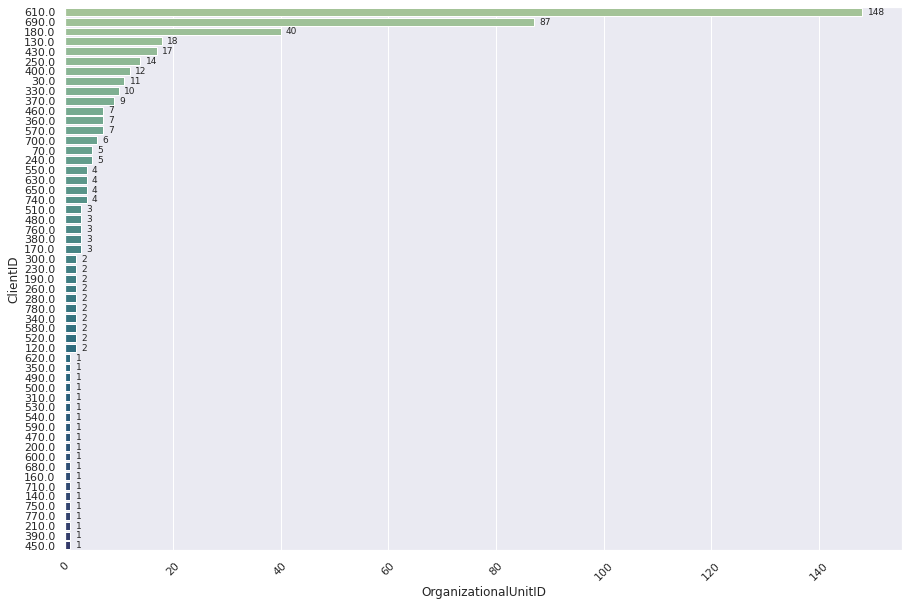

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.barplot(y="ClientID",x = 'OrganizationalUnitID', 
          order=client_orga.sort_values('OrganizationalUnitID',ascending=False).ClientID,
              orient='h', 
              data=client_orga, 
              ax=ax, 
              palette='crest')


for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       # 
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha = 'left',
            va = 'center',
            size=9) 
plt.xticks(rotation=45)
plt.show()

In [26]:
average_orga_per_client = data_df['OrganizationalUnitID'].nunique() /data_df['ClientID'].nunique()

In [27]:
average_orga_per_client

8.618181818181819

In [28]:
data_df['SourceID'].value_counts()

11464.0    1474
14247.0    1455
11527.0    1429
10689.0    1395
11393.0    1395
           ... 
27373.0       1
10336.0       1
27351.0       1
27330.0       1
27391.0       1
Name: SourceID, Length: 5737, dtype: int64

In [29]:
data_df['SourceDescription'].value_counts().index[:10]

Index(['Consumo eléctrico oficinas', 'Consumo eléctrico', 'Consumo gasóleo A',
       'Suministro eléctrico', 'Consumo agua', 'Consumo gasolina',
       'Consumo diésel (B7)', 'Consumo gasóleo B', 'Consumo gas natural',
       '0007078836114125858 Gasoleo'],
      dtype='object')

In [30]:
data_df['ValueDate'].isna().sum()

0

In [31]:
data_df['ValueDate'].dt.day.nunique()

1

We wont be using this column because we have the same value in column year and month

In [32]:
data_df['Month'].value_counts()

2.0     54622
3.0     53607
1.0     52298
9.0     44731
11.0    43252
6.0     40682
7.0     40590
8.0     38541
5.0     38310
12.0    37778
4.0     35088
10.0    34675
Name: Month, dtype: int64

In [33]:
data_df['Year'].value_counts()

2021.0    210857
2020.0    149054
2019.0     95870
2022.0     44046
2018.0      7290
2017.0      4382
2016.0      1753
2015.0       649
2014.0       261
2013.0        12
Name: Year, dtype: int64

In [34]:
data_df['PeriodID'].value_counts()

168.0    133971
169.0     91170
170.0     78729
246.0     37131
153.0     20516
          ...  
173.0         2
186.0         2
230.0         2
197.0         2
133.0         1
Name: PeriodID, Length: 180, dtype: int64

In [35]:
data_df['PeriodDescription'].value_counts()

Año 2021     210398
Año 2020     148254
Año 2019      95963
Año 2022      43863
Año 2018       5448
Año 2017       3373
FY 2016         948
FY 2017         888
FY 2018         775
Año 2016        654
FY 2019         615
FY 2020         568
FY 2021         492
Año 2015        412
FY 2022         289
Year 2020       284
Año 2014        261
Year 2019       215
Year 2016       166
Year 2018       153
Year 2017       143
Año 2013         12
Name: PeriodDescription, dtype: int64

In [36]:
data_df['AspectGroupID'].value_counts()

3.0     388127
1.0      54848
11.0     26692
5.0      13257
6.0      12079
10.0     11314
2.0       7072
12.0       749
8.0         36
Name: AspectGroupID, dtype: int64

In [37]:
data_df['AspectGroupDescription'].value_counts()

Combustible                     388127
Electricidad                     54848
Indicadores                      26692
Residuos                         13257
Materias primas                  12079
Viajes                           11314
Agua                              7072
Emisiones                          749
Emisiones bienes y servicios        36
Name: AspectGroupDescription, dtype: int64

In [38]:
data_df['FactorID'].value_counts()

5.0    357797
1.0    111327
4.0     11949
3.0     10742
8.0      9594
2.0      7072
7.0      5657
9.0        36
Name: FactorID, dtype: int64

In [39]:
data_df['FactorDescription'].value_counts()

Emisiones             357797
Energía               111327
Residuos               11949
Materias Primas        10742
Indicadores             9594
Agua y Efluentes        7072
Viajes                  5657
Emisiones evitadas        36
Name: FactorDescription, dtype: int64

In [40]:
data_df['AspectID'].value_counts()

77.0     295802
7.0       59077
1.0       54848
140.0     24422
79.0      13188
          ...  
205.0         1
216.0         1
212.0         1
174.0         1
231.0         1
Name: AspectID, Length: 217, dtype: int64

In [41]:
data_df['AspectDescription'].value_counts()

Consumo gasóleo A                 295802
Consumo gasolina                   59077
Consumo eléctrico                  54848
Consumo GLP                        24422
Consumo gasóleo A (A3)             13188
                                   ...  
Residuos químicos                      1
Consumo fuelóleo                       1
Tintas pastosas                        1
Productos enológicos obsoletos         1
Resinas                                1
Name: AspectDescription, Length: 216, dtype: int64

## Target Value Analysis

In [42]:
data_df['Value']

0         0.169863014
1         0.153424658
2         0.169863014
3         0.164383562
4         0.169863014
             ...     
514266        0.96264
514267           8022
514268        115.968
514269        115.968
514270           9664
Name: Value, Length: 514174, dtype: object

In [43]:
#change data type of value to numeric and handle numerical structure of value
data_df['new_value'] = data_df.apply(lambda row: ".".join(str(row['Value']).replace(",",'.').split('.')[:2]), axis=1)

In [44]:
data_df['new_value']

0         0.169863014
1         0.153424658
2         0.169863014
3         0.164383562
4         0.169863014
             ...     
514266        0.96264
514267           8022
514268        115.968
514269        115.968
514270           9664
Name: new_value, Length: 514174, dtype: object

In [47]:
data_df['new_value'] = data_df['new_value'].astype(float)

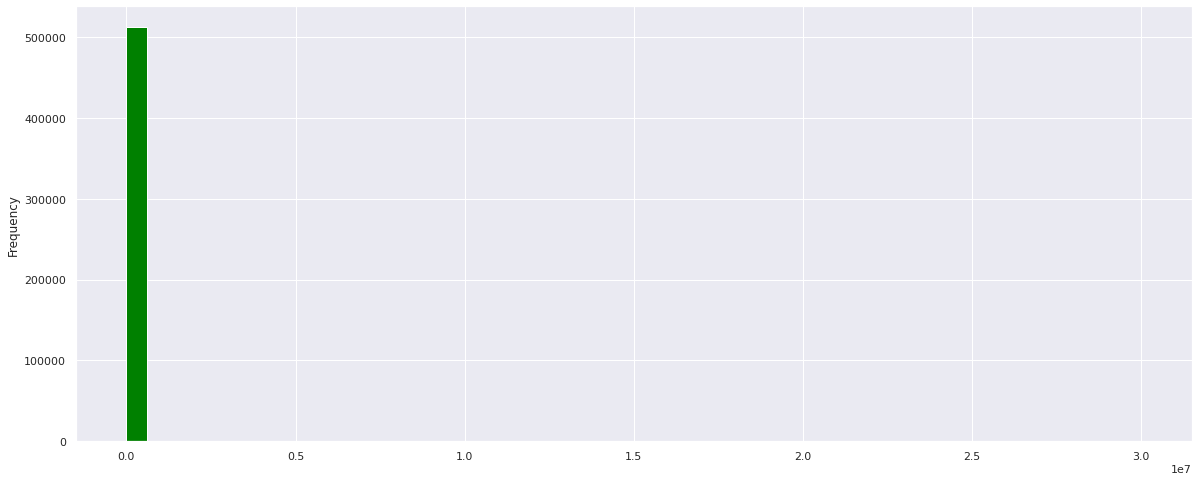

In [48]:
# distriution of value
plt.figure(figsize=(20,8))
data_df['new_value'].astype(float).plot.hist(bins=50,range=(0,30_000_000),color='green')
plt.show()

In [49]:
#show the distribution range
data_df['new_value'].loc[(data_df['new_value'] > 0) & (data_df['new_value'] < 52)].shape[0]/len(data_df)

0.8722455822348076

In [50]:
data_df['new_value'] = data_df['new_value'].astype(float)

As we can see from the graph most of the values are skewed left and the values are close to zero.

In [51]:
data_df.groupby(['ClientID']).agg({"new_value":"sum"}).reset_index().sort_values(by="new_value",ascending=False)

,ClientID,new_value
7,180.0,5.714164e+08
29,470.0,3.233105e+08
14,260.0,1.829928e+08
12,240.0,8.422230e+07
8,190.0,5.536792e+07
15,280.0,4.715223e+07
42,610.0,2.231837e+07
24,390.0,8.862316e+06
2,120.0,4.414952e+06
28,460.0,3.405380e+06


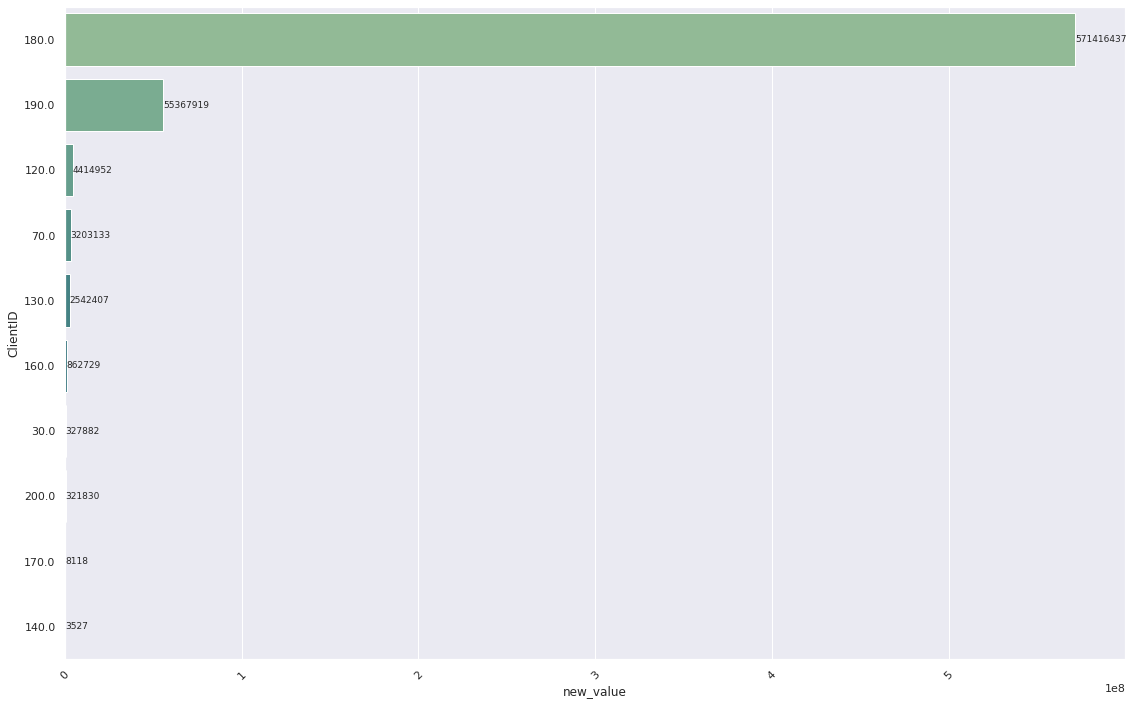

In [52]:
fig,ax = plt.subplots(figsize=(19,12))
sns.color_palette("crest", as_cmap=True)
ax=sns.barplot(y="ClientID",x = 'new_value', 
               orient='h', 
          order=data_df.groupby(['ClientID']).agg({"new_value":"sum"}).reset_index().head(10).sort_values('new_value',ascending=False).ClientID,
              data=data_df.groupby(['ClientID']).agg({"new_value":"sum"}).reset_index().head(10), 
              ax=ax,palette="crest")


for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       # 
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha = 'left',
            va = 'center',
            size=9) 
plt.xticks(rotation=45)
plt.show()

In [53]:
data_df.groupby(['ClientID','OrganizationalUnitID']).agg({"new_value":"sum"}).reset_index().sort_values(by="new_value",ascending=False)

,ClientID,OrganizationalUnitID,new_value
61,180.0,434.0,3.579542e+08
183,470.0,440.0,3.233105e+08
106,260.0,220.0,1.805457e+08
43,180.0,135.0,8.369363e+07
90,240.0,165.0,6.567993e+07
...,...,...,...
305,610.0,827.0,4.990000e-01
300,610.0,817.0,7.485000e-02
301,610.0,819.0,4.990000e-02
425,690.0,1565.0,7.819396e-03


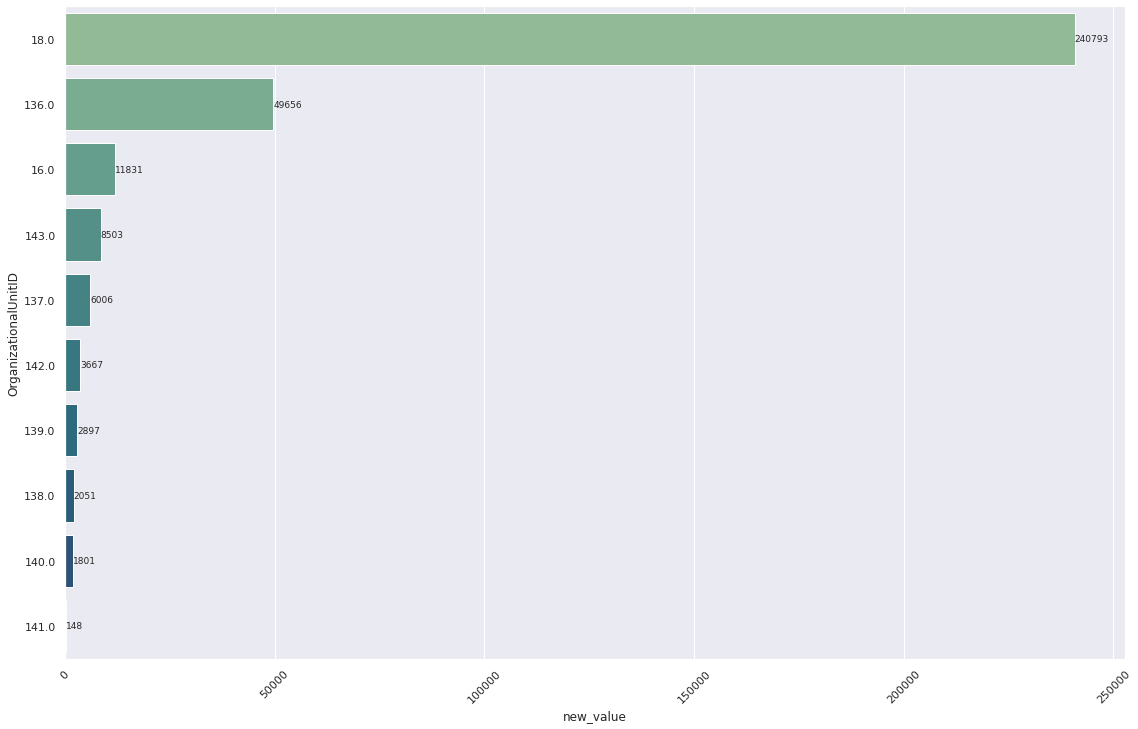

In [54]:
fig,ax = plt.subplots(figsize=(19,12))
ax=sns.barplot(y="OrganizationalUnitID",x = 'new_value', 
               orient='h', 
          order=data_df.groupby(['ClientID','OrganizationalUnitID']).agg({"new_value":"sum"}).reset_index().head(10).sort_values('new_value',ascending=False).OrganizationalUnitID,
              data=data_df.groupby(['ClientID','OrganizationalUnitID']).agg({"new_value":"sum"}).reset_index().head(10), 
              ax=ax,palette='crest')


for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       # 
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha = 'left',
            va = 'center',
            size=9) 
plt.xticks(rotation=45)
plt.show()

In [55]:
orga_year = data_df.groupby(['OrganizationalUnitID','Year']).agg({"new_value":"sum"}).reset_index().sort_values(by="new_value",ascending=False)
orga_year

,OrganizationalUnitID,Year,new_value
406,440.0,2020.0,3.224508e+08
400,434.0,2021.0,1.476181e+08
399,434.0,2020.0,1.388137e+08
168,220.0,2020.0,7.159070e+07
169,220.0,2021.0,5.624291e+07
...,...,...,...
954,1556.0,2021.0,2.085172e-03
484,501.0,2019.0,0.000000e+00
486,502.0,2019.0,0.000000e+00
487,502.0,2020.0,0.000000e+00


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


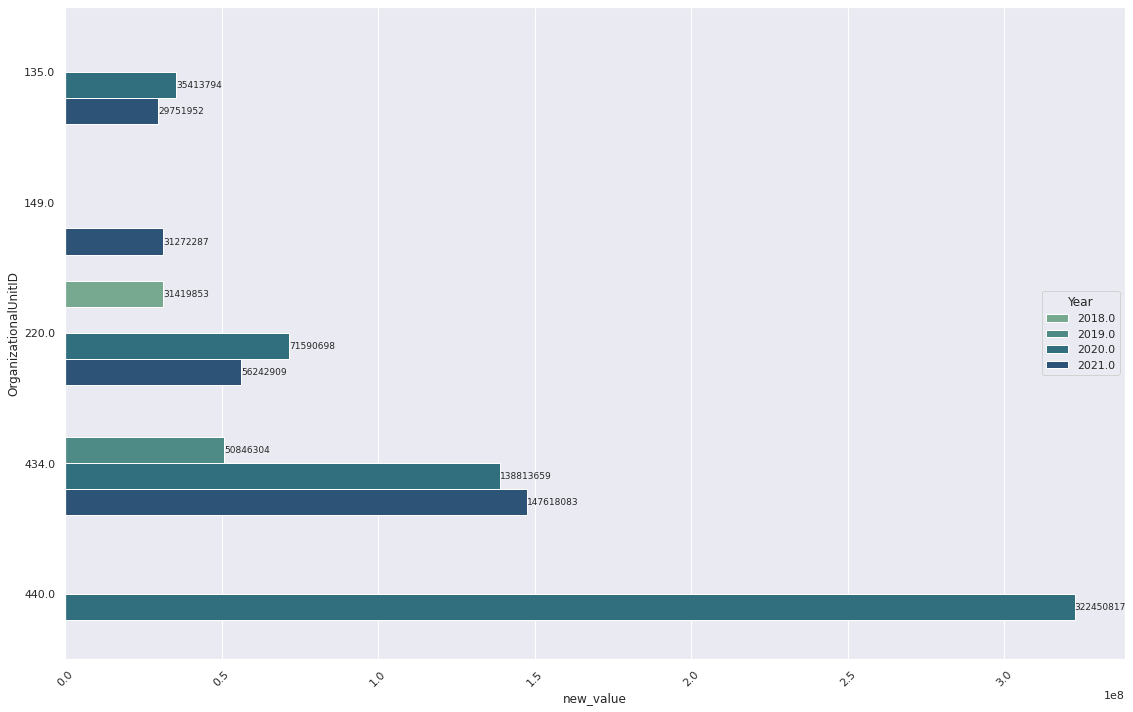

In [56]:
fig,ax = plt.subplots(figsize=(19,12))
ax=sns.barplot(y="OrganizationalUnitID",x = 'new_value',hue='Year',
               orient='h', 
              data=orga_year.head(10), 
              ax=ax,palette='crest')


for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       # 
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha = 'left',
            va = 'center',
            size=9) 
plt.xticks(rotation=45)
plt.show()

In [57]:
orga_month = data_df.groupby(['OrganizationalUnitID','Month']).agg({"new_value":"sum"}).reset_index().sort_values(by="new_value",ascending=False)
orga_month

,OrganizationalUnitID,Month,new_value
1355,434.0,10.0,5.701680e+07
1349,434.0,4.0,5.542185e+07
1356,434.0,11.0,4.358633e+07
1350,434.0,5.0,3.747639e+07
1348,434.0,3.0,3.744795e+07
...,...,...,...
4415,1583.0,6.0,-1.736825e+02
4497,1591.0,5.0,-1.854925e+02
4363,1578.0,5.0,-4.076747e+02
4421,1583.0,12.0,-4.146429e+02


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

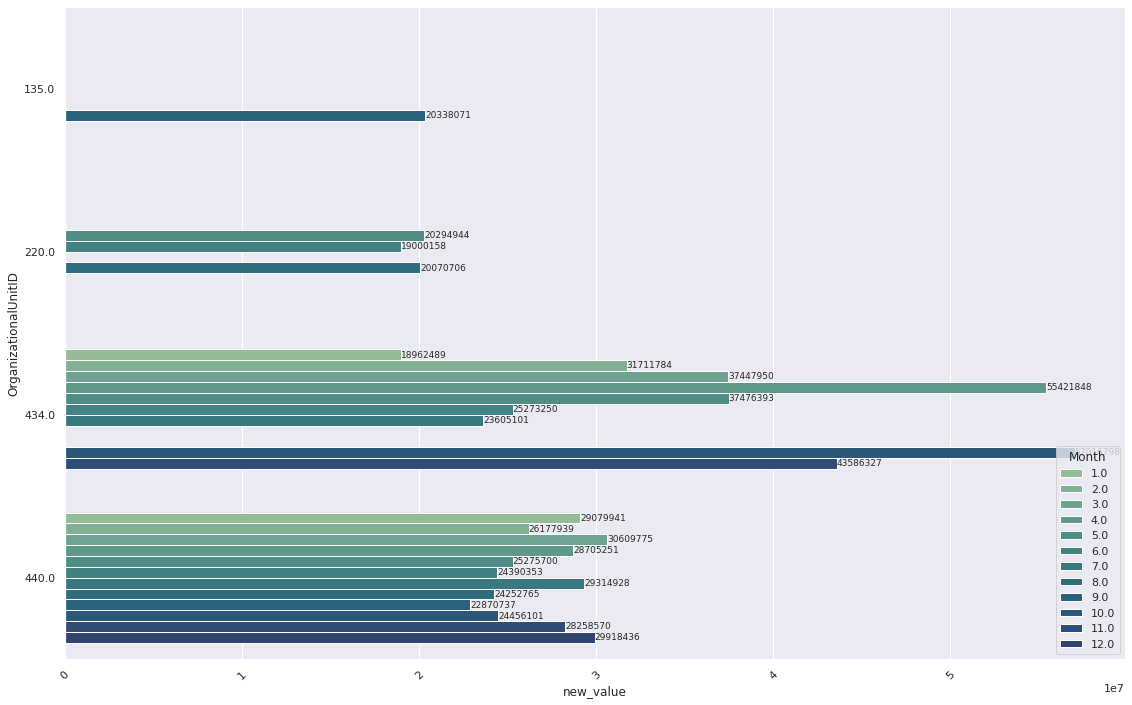

In [58]:
fig,ax = plt.subplots(figsize=(19,12))
ax=sns.barplot(y="OrganizationalUnitID",x = 'new_value',hue='Month',
               orient='h', 
              data=orga_month.head(25), 
              ax=ax,palette='crest')


for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       # 
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha = 'left',
            va = 'center',
            size=9) 
plt.xticks(rotation=45)
plt.show()

In [59]:
client_year_month = data_df.groupby(['ClientID','Year','Month']).agg({"new_value":"sum"}).reset_index().sort_values(by="new_value",ascending=False)
client_year_month

,ClientID,Year,Month,new_value
393,180.0,2021.0,10.0,3.731550e+07
1119,470.0,2020.0,3.0,3.060977e+07
374,180.0,2020.0,3.0,2.984727e+07
389,180.0,2021.0,6.0,2.982650e+07
388,180.0,2021.0,5.0,2.936631e+07
...,...,...,...,...
562,210.0,2018.0,7.0,1.147000e+00
749,280.0,2021.0,7.0,1.015000e+00
927,350.0,2020.0,5.0,4.843750e-01
1466,690.0,2018.0,11.0,1.764706e-01


In [60]:
data_df.isna().sum()

Id                                        0
ClientID                                  0
ClientDescription                         0
OrganizationalUnitID                      0
OrganizationalUnitDescription             0
OrganizationalUnitTypeID                  0
OrganizationalUnitTypeDescription         0
SourceID                              11314
SourceDescription                     11314
ValueDate                                 0
Month                                     0
Year                                      0
PeriodID                                  0
PeriodDescription                         0
AspectGroupID                             0
AspectGroupDescription                    0
FactorID                                  0
FactorDescription                         0
AspectID                                  0
AspectDescription                         0
Value                                    12
UnitID                                   12
UnitDescription                 

In [61]:
data_df.loc[data_df['Id'] == 7965.0]

,Id,ClientID,ClientDescription,OrganizationalUnitID,OrganizationalUnitDescription,OrganizationalUnitTypeID,OrganizationalUnitTypeDescription,SourceID,SourceDescription,ValueDate,...,WasteTypeDescription,WasteTreatmentID,WasteTreatmentDescription,TransportID,TransportDescription,TransportTypeID,TransportTypeDescription,BiogenicEmission,Renovable,new_value
7,7965.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-08-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.169863


In [62]:
data_df.head()

,Id,ClientID,ClientDescription,OrganizationalUnitID,OrganizationalUnitDescription,OrganizationalUnitTypeID,OrganizationalUnitTypeDescription,SourceID,SourceDescription,ValueDate,...,WasteTypeDescription,WasteTreatmentID,WasteTreatmentDescription,TransportID,TransportDescription,TransportTypeID,TransportTypeDescription,BiogenicEmission,Renovable,new_value
0,7958.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.169863
1,7959.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.153425
2,7960.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.169863
3,7961.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.164384
4,7962.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.169863


In [63]:
data_df['Value'].isna().sum()

12

In [64]:
data_df = data_df.loc[~data_df['Value'].isna()]

In [65]:
data_df.isna().sum()

Id                                        0
ClientID                                  0
ClientDescription                         0
OrganizationalUnitID                      0
OrganizationalUnitDescription             0
OrganizationalUnitTypeID                  0
OrganizationalUnitTypeDescription         0
SourceID                              11314
SourceDescription                     11314
ValueDate                                 0
Month                                     0
Year                                      0
PeriodID                                  0
PeriodDescription                         0
AspectGroupID                             0
AspectGroupDescription                    0
FactorID                                  0
FactorDescription                         0
AspectID                                  0
AspectDescription                         0
Value                                     0
UnitID                                    0
UnitDescription                 

In [66]:
data_df.dtypes

Id                                          float64
ClientID                                    float64
ClientDescription                            object
OrganizationalUnitID                        float64
OrganizationalUnitDescription                object
OrganizationalUnitTypeID                    float64
OrganizationalUnitTypeDescription            object
SourceID                                    float64
SourceDescription                            object
ValueDate                            datetime64[ns]
Month                                       float64
Year                                        float64
PeriodID                                    float64
PeriodDescription                            object
AspectGroupID                               float64
AspectGroupDescription                       object
FactorID                                    float64
FactorDescription                            object
AspectID                                    float64
AspectDescri

In [67]:
data_df["GEIDescription"].value_counts()

CO2eq       127648
C02          93977
CH4          67808
N2O          67808
R-410A         134
R-407C         112
HFC-134a        80
R-449A          68
R-407F          60
R-404A          41
R-407H          17
R-422D          16
R-448A          16
R-424A          12
R-453A           9
R-438A           4
R-22             4
R-407A           3
R-422A           2
R-426A           2
Name: GEIDescription, dtype: int64

In [68]:
data_df["GEIDescription"].value_counts()

CO2eq       127648
C02          93977
CH4          67808
N2O          67808
R-410A         134
R-407C         112
HFC-134a        80
R-449A          68
R-407F          60
R-404A          41
R-407H          17
R-422D          16
R-448A          16
R-424A          12
R-453A           9
R-438A           4
R-22             4
R-407A           3
R-422A           2
R-426A           2
Name: GEIDescription, dtype: int64

In [69]:
data_df.isna().sum()

Id                                        0
ClientID                                  0
ClientDescription                         0
OrganizationalUnitID                      0
OrganizationalUnitDescription             0
OrganizationalUnitTypeID                  0
OrganizationalUnitTypeDescription         0
SourceID                              11314
SourceDescription                     11314
ValueDate                                 0
Month                                     0
Year                                      0
PeriodID                                  0
PeriodDescription                         0
AspectGroupID                             0
AspectGroupDescription                    0
FactorID                                  0
FactorDescription                         0
AspectID                                  0
AspectDescription                         0
Value                                     0
UnitID                                    0
UnitDescription                 

In [70]:
data_df.head()

,Id,ClientID,ClientDescription,OrganizationalUnitID,OrganizationalUnitDescription,OrganizationalUnitTypeID,OrganizationalUnitTypeDescription,SourceID,SourceDescription,ValueDate,...,WasteTypeDescription,WasteTreatmentID,WasteTreatmentDescription,TransportID,TransportDescription,TransportTypeID,TransportTypeDescription,BiogenicEmission,Renovable,new_value
0,7958.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.169863
1,7959.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.153425
2,7960.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.169863
3,7961.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.164384
4,7962.0,30.0,Cliente anonimizado,18.0,Unidad organizativa anonimizada,3.0,Oficina,18.0,Consumo toner,2017-05-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.169863


In [71]:
data_df["ClientDescription"].value_counts()

Cliente anonimizado    514162
Name: ClientDescription, dtype: int64

In [72]:
data_df["ClientID"].value_counts().head()

460.0    341047
180.0     43846
690.0     42783
610.0     24903
130.0      5154
Name: ClientID, dtype: int64

In [73]:
data_df["PeriodDescription"].value_counts()

Año 2021     210398
Año 2020     148254
Año 2019      95951
Año 2022      43863
Año 2018       5448
Año 2017       3373
FY 2016         948
FY 2017         888
FY 2018         775
Año 2016        654
FY 2019         615
FY 2020         568
FY 2021         492
Año 2015        412
FY 2022         289
Year 2020       284
Año 2014        261
Year 2019       215
Year 2016       166
Year 2018       153
Year 2017       143
Año 2013         12
Name: PeriodDescription, dtype: int64

In [74]:
data_df["VendorName"].value_counts()

Solred                                   392143
ENÉRGYA VM GESTIÓN DE ENERGÍA. S.L.U.     10420
Endesa Energía S.A                         7908
Iberdrola Clientes S.A.U                   6874
Genérico                                   5492
                                          ...  
ERCI-EMPRESA RECICLAGEM                       1
Aemsys                                        1
Ecoplast                                      1
Recilec                                       1
INLOGEM                                       1
Name: VendorName, Length: 317, dtype: int64

In [75]:
data_df["EmitterGEIDescription"].value_counts().index[:20]

Index(['Gasóleo A', 'Gasóleo A o B ', 'Gasolina', 'Electricidad', 'GLP',
       'Gasóleo B', 'Residuos', 'Gas natural', 'Diesel', 'Gasoil',
       'Combustible aviación', 'Gas propano', 'Emisiones manual',
       'Combustible', 'Materias primas', 'R-410A', 'Gasóleo C', 'R-407C',
       'HFC-134a', 'Depuración aguas'],
      dtype='object')

In [76]:
data_df["ScopeDescription"].value_counts().index

Index(['Alcance 1', 'Alcance 2', 'Alcance 3', 'Sin Alcance', 'Biogénico'], dtype='object')

In [77]:
data_df["Month"]

0         1.0
1         2.0
2         3.0
3         4.0
4         5.0
         ... 
514266    2.0
514267    2.0
514268    1.0
514269    1.0
514270    1.0
Name: Month, Length: 514162, dtype: float64

In [78]:
data_df.isna().sum()

Id                                        0
ClientID                                  0
ClientDescription                         0
OrganizationalUnitID                      0
OrganizationalUnitDescription             0
OrganizationalUnitTypeID                  0
OrganizationalUnitTypeDescription         0
SourceID                              11314
SourceDescription                     11314
ValueDate                                 0
Month                                     0
Year                                      0
PeriodID                                  0
PeriodDescription                         0
AspectGroupID                             0
AspectGroupDescription                    0
FactorID                                  0
FactorDescription                         0
AspectID                                  0
AspectDescription                         0
Value                                     0
UnitID                                    0
UnitDescription                 

In [79]:
columns_to_use = ['Id','ClientID','OrganizationalUnitID','OrganizationalUnitTypeDescription',
                  'SourceDescription','Month','Year','PeriodDescription','AspectGroupDescription','FactorDescription',
                  'AspectDescription','UnitDescription','GEIDescription','EmitterGEIDescription','VendorName',
                  'ScopeDescription','BiogenicEmission','new_value']

In [80]:
data_to_use = data_df[columns_to_use]

In [81]:
data_to_use.head()

,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,FactorDescription,AspectDescription,UnitDescription,GEIDescription,EmitterGEIDescription,VendorName,ScopeDescription,BiogenicEmission,new_value
0,7958.0,30.0,18.0,Oficina,Consumo toner,1.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.169863
1,7959.0,30.0,18.0,Oficina,Consumo toner,2.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.153425
2,7960.0,30.0,18.0,Oficina,Consumo toner,3.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.169863
3,7961.0,30.0,18.0,Oficina,Consumo toner,4.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.164384
4,7962.0,30.0,18.0,Oficina,Consumo toner,5.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.169863


In [82]:
data_to_use.isna().sum()

Id                                        0
ClientID                                  0
OrganizationalUnitID                      0
OrganizationalUnitTypeDescription         0
SourceDescription                     11314
Month                                     0
Year                                      0
PeriodDescription                         0
AspectGroupDescription                    0
FactorDescription                         0
AspectDescription                         0
UnitDescription                           0
GEIDescription                       156341
EmitterGEIDescription                 34724
VendorName                            33989
ScopeDescription                     156365
BiogenicEmission                         85
new_value                                 0
dtype: int64

In [83]:
data_to_use.loc[data_to_use['ScopeDescription'].isna()]

,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,FactorDescription,AspectDescription,UnitDescription,GEIDescription,EmitterGEIDescription,VendorName,ScopeDescription,BiogenicEmission,new_value
0,7958.0,30.0,18.0,Oficina,Consumo toner,1.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.169863
1,7959.0,30.0,18.0,Oficina,Consumo toner,2.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.153425
2,7960.0,30.0,18.0,Oficina,Consumo toner,3.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.169863
3,7961.0,30.0,18.0,Oficina,Consumo toner,4.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.164384
4,7962.0,30.0,18.0,Oficina,Consumo toner,5.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,NaN,NaN,PCToner,NaN,False,0.169863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514260,1753938.0,690.0,1513.0,Oficina,Consumo eléctrico oficinas,4.0,2022.0,Año 2022,Electricidad,Energía,Consumo eléctrico,kWh,NaN,Electricidad,ENÉRGYA VM GESTIÓN DE ENERGÍA. S.L.U.,NaN,False,0.000000
514262,1753940.0,690.0,1513.0,Oficina,Consumo eléctrico oficinas,4.0,2022.0,Año 2022,Electricidad,Energía,Consumo eléctrico,kWh,NaN,Electricidad,ENÉRGYA VM GESTIÓN DE ENERGÍA. S.L.U.,NaN,False,0.000000
514264,1753942.0,690.0,1513.0,Oficina,Consumo eléctrico oficinas,4.0,2022.0,Año 2022,Electricidad,Energía,Consumo eléctrico,kWh,NaN,Electricidad,ENÉRGYA VM GESTIÓN DE ENERGÍA. S.L.U.,NaN,False,0.000000
514267,1753945.0,700.0,1606.0,Oficina,Consumo eléctrico oficinas,2.0,2022.0,Año 2022,Electricidad,Energía,Consumo eléctrico,kWh,NaN,Electricidad,Edp Clientes Sau,NaN,False,8022.000000


In [84]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else (x.mode().iloc[0] if len(x.mode())>0 else np.nan)
data_to_use = data_to_use.fillna(data_to_use.groupby('ClientID').transform(f))

In [85]:
data_to_use['SourceDescription'].value_counts()

Consumo eléctrico oficinas              15550
Consumo eléctrico                       14502
Suministro eléctrico                     7069
Consumo gasóleo A                        4738
Consumo agua                             3305
                                        ...  
Productos enológicos obsoletos              1
Lodos de lavado y limpieza Verinsur         1
Sacos Big Bag contaminados                  1
Cartuchos tinta                             1
0007078835341313527 adblue                  1
Name: SourceDescription, Length: 3932, dtype: int64

In [86]:
data_to_use.isna().sum()

Id                                      0
ClientID                                0
OrganizationalUnitID                    0
OrganizationalUnitTypeDescription       0
SourceDescription                      12
Month                                   0
Year                                    0
PeriodDescription                       0
AspectGroupDescription                  0
FactorDescription                       0
AspectDescription                       0
UnitDescription                         0
GEIDescription                         26
EmitterGEIDescription                  26
VendorName                           1087
ScopeDescription                       26
BiogenicEmission                        0
new_value                               0
dtype: int64

In [87]:
data_to_use = data_to_use.fillna(data_to_use.mode().iloc[0])

In [88]:
data_to_use.isna().sum()

Id                                   0
ClientID                             0
OrganizationalUnitID                 0
OrganizationalUnitTypeDescription    0
SourceDescription                    0
Month                                0
Year                                 0
PeriodDescription                    0
AspectGroupDescription               0
FactorDescription                    0
AspectDescription                    0
UnitDescription                      0
GEIDescription                       0
EmitterGEIDescription                0
VendorName                           0
ScopeDescription                     0
BiogenicEmission                     0
new_value                            0
dtype: int64

In [89]:
data_to_use.dtypes

Id                                   float64
ClientID                             float64
OrganizationalUnitID                 float64
OrganizationalUnitTypeDescription     object
SourceDescription                     object
Month                                float64
Year                                 float64
PeriodDescription                     object
AspectGroupDescription                object
FactorDescription                     object
AspectDescription                     object
UnitDescription                       object
GEIDescription                        object
EmitterGEIDescription                 object
VendorName                            object
ScopeDescription                      object
BiogenicEmission                        bool
new_value                            float64
dtype: object

In [90]:
data_to_use

,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,FactorDescription,AspectDescription,UnitDescription,GEIDescription,EmitterGEIDescription,VendorName,ScopeDescription,BiogenicEmission,new_value
0,7958.0,30.0,18.0,Oficina,Consumo toner,1.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.169863
1,7959.0,30.0,18.0,Oficina,Consumo toner,2.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.153425
2,7960.0,30.0,18.0,Oficina,Consumo toner,3.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.169863
3,7961.0,30.0,18.0,Oficina,Consumo toner,4.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.164384
4,7962.0,30.0,18.0,Oficina,Consumo toner,5.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.169863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514266,1753944.0,700.0,1606.0,Oficina,Consumo eléctrico oficinas,2.0,2022.0,Año 2022,Electricidad,Emisiones,Consumo eléctrico,t,CO2eq,Electricidad,Edp Clientes Sau,Alcance 2,False,0.962640
514267,1753945.0,700.0,1606.0,Oficina,Consumo eléctrico oficinas,2.0,2022.0,Año 2022,Electricidad,Energía,Consumo eléctrico,kWh,CO2eq,Electricidad,Edp Clientes Sau,Alcance 1,False,8022.000000
514268,1753946.0,700.0,1606.0,Oficina,Consumo eléctrico oficinas,1.0,2022.0,Año 2022,Electricidad,Emisiones,Consumo eléctrico,t,C02,Electricidad,Edp Clientes Sau,Alcance 2,False,115.968000
514269,1753947.0,700.0,1606.0,Oficina,Consumo eléctrico oficinas,1.0,2022.0,Año 2022,Electricidad,Emisiones,Consumo eléctrico,t,CO2eq,Electricidad,Edp Clientes Sau,Alcance 2,False,115.968000


In [91]:
data_to_use.to_csv("drive/MyDrive/Capstone/data_to_use.csv")